Представьте, что вы работаете аналитиком в компании, которая занимается арендой  велосипедов. 
Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. 
Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.



#                                                    Задания
 1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. 
    Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
 2. Постройте график по числу поездок по дате и времени.
 3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
 4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. 
    В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
 5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. 
    Далее – найдите стандартное отклонение.
 6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
 7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
 8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

#    Описание данных
- timestamp – дата и время (точность до часа)
- cnt – количество аренд велосипедов за этот час
- t1 – температура, в С
- t2 – температура "ощущается как", в С 
- hum – влажность (%)
- wind_speed – скорость ветра, км/ч
- weather_code – погодные условия:
-   --  1 – ясно (SKC)
-   --  2 – преимущественно ясно / встречаются отдельные облака (SCT)
-   --  3 – облачно / значительные облака (BKN)
-   --  4 – пасмурно (OVC)
-   --  7 – небольшой дождь Rain/ light Rain shower/ Light rain 
-   --  10 – дождь с грозой
-   --  26 – снегопад 
-   --  94 – ледяной туман (да, такое бывает!)
- isholiday – является ли день праздником (1 – праздник, 0 – нет)
- isweekend –  является ли день выходным (1 – выходной, 0 – нет)
- season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

sns.set(rc={'figure.figsize':(12,6)}, style='whitegrid')

# 1
Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [4]:
df = pd.read_csv('C:/Users/рома/Downloads/london.csv', parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df.shape

(17414, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [6]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

# 2
Постройте график по числу поездок по дате и времени.

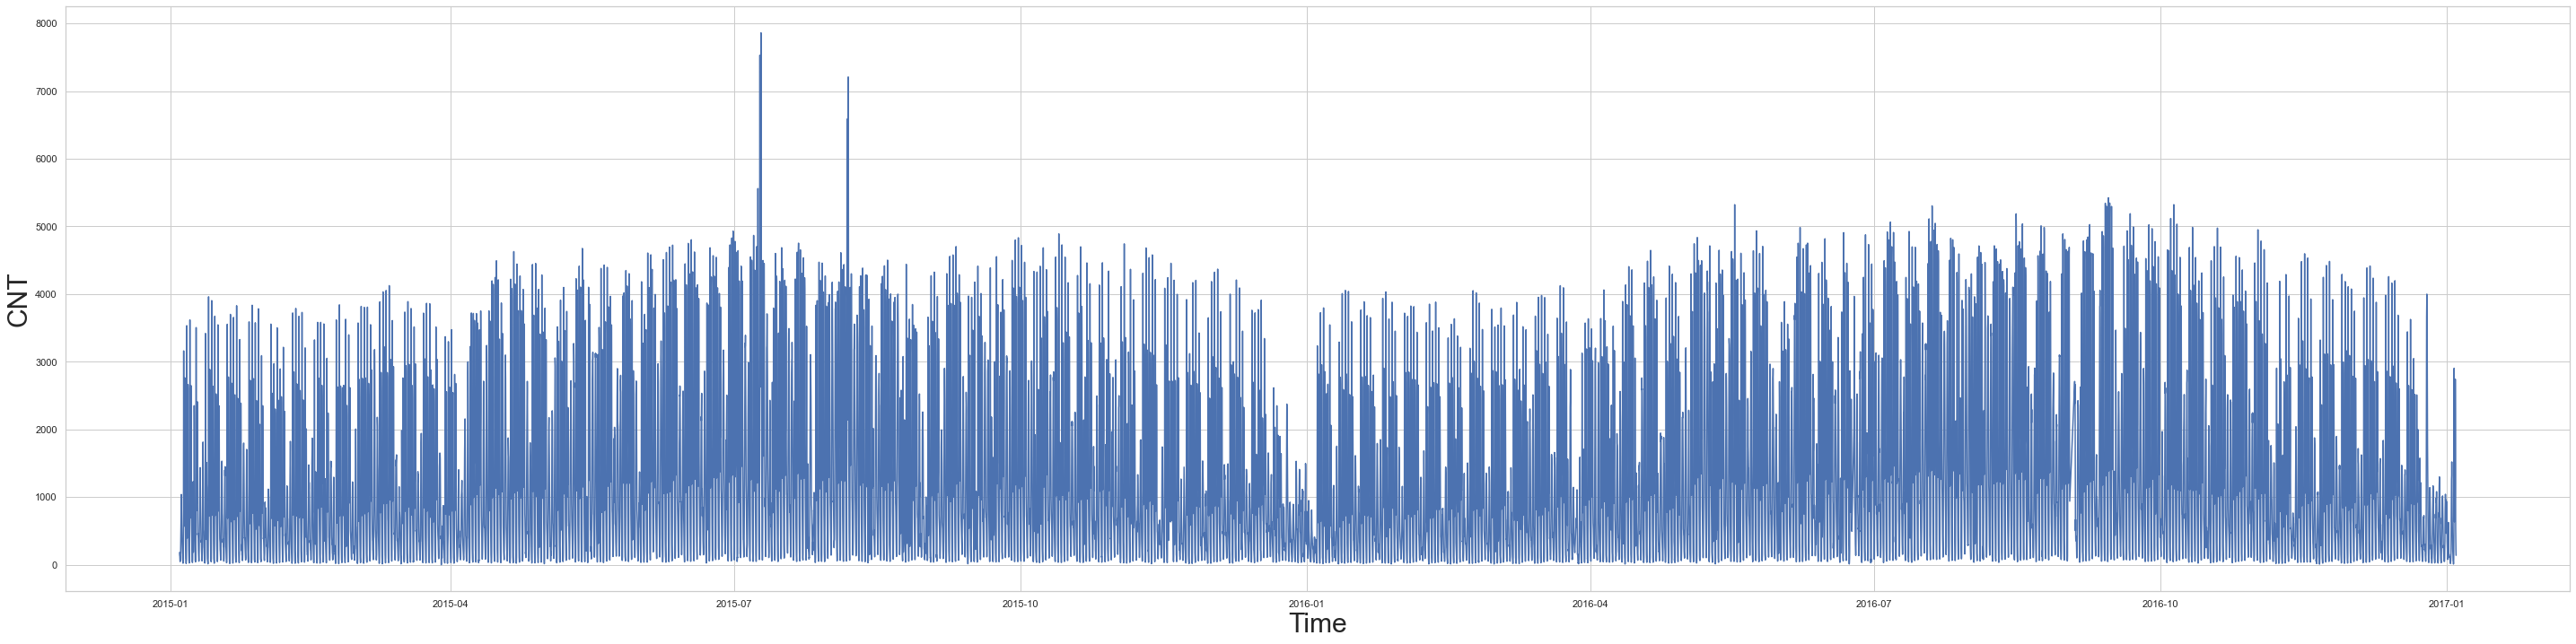

In [10]:
lineplot, ax = plt.subplots(figsize = (50,12))
ax =sns.lineplot(x = 'timestamp', y ='cnt', data=df)
ax.set_ylabel('CNT', fontsize = 30)
ax.set_xlabel ('Time', fontsize = 30);

отбражение в таком виде является не информативным - необходиомо преобразоват данные

# 3
Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

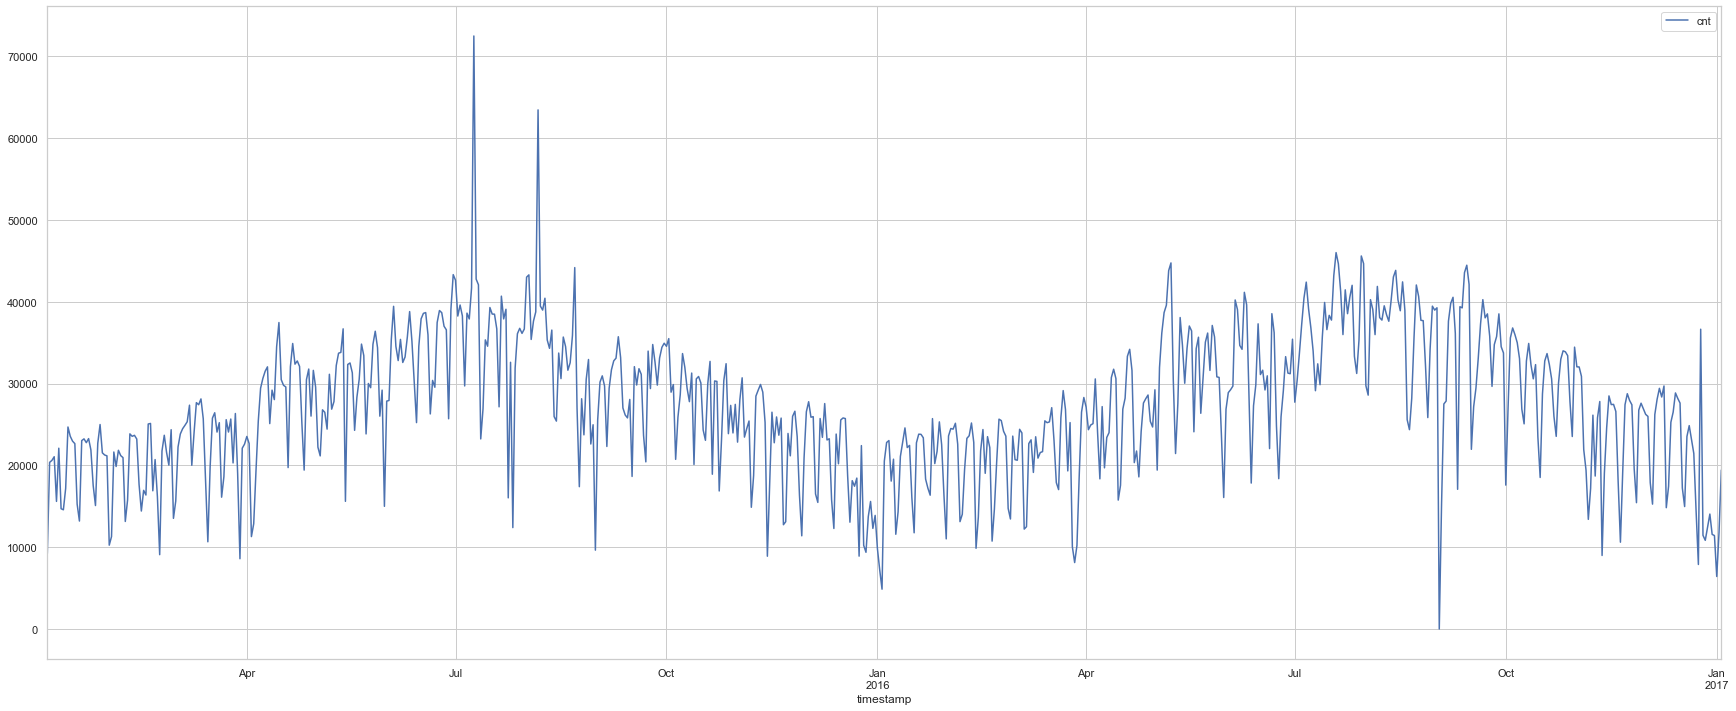

In [11]:
df.sort_values('timestamp', inplace = True)
df.set_index('timestamp', drop=False, inplace=True)
df.resample(rule='D').agg({'cnt':'sum'}).plot(figsize=(30,12));


# 4
Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [19]:
df_by_day = df.resample(rule='D').cnt.sum().reset_index()
df_by_day.head()

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [20]:
df_by_day_roll = df.resample(rule='D').cnt.sum().rolling(window=3).mean().reset_index()
df_by_day_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


In [21]:
df_by_day_roll.query('timestamp=="2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


# 5 
Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [22]:
round(np.std(df_by_day['cnt']-df_by_day_roll['cnt']),2)

4558.59

In [23]:
std = np.std(df_by_day['cnt']-df_by_day_roll['cnt'])

# 6
Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

In [24]:
upper_bound = df_by_day_roll.cnt + (2.576 * std)
lower_bound = df_by_day_roll.cnt - (2.576 * std)
df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound

In [25]:
df_by_day

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479
...,...,...,...,...
726,2016-12-30,11566,24424.919188,939.080812
727,2016-12-31,11424,24090.252521,604.414146
728,2017-01-01,6421,21546.585854,-1939.252521
729,2017-01-02,11823,21632.252521,-1853.585854


# 7
Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. 

In [26]:
df_by_day[df_by_day.cnt>df_by_day.upper_bound]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


# 8
Изучите аномально низкие значения, найдите день с наименьшим числом аренд.

In [27]:
df_by_day[df_by_day.cnt<df_by_day.lower_bound]

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812
